In [1]:
%run '../dynamo_helper_functions.ipynb'

/tmp/ipykernel_1789817/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


['/net/capricorn/home/xing/soh29/.conda/envs/dynamo_06_2024/lib/python3.8/site-packages/dynamo']


package,umap-learn,trimap,tqdm,statsmodels,setuptools,seaborn,scipy,scikit-learn,python-igraph,pynndescent,pre-commit,pandas,numpy,numdifftools,numba,networkx,matplotlib,loompy,hdbscan,dynamo-release,cvxopt,colorcet
version,0.5.6,1.1.4,4.66.4,0.14.1,70.1.0,0.13.2,1.10.1,1.3.2,0.11.5,0.5.8,3.5.0,1.2.0,1.23.0,0.9.41,0.51.2,3.1,3.7.5,3.0.7,0.8.37,1.0.0,1.3.2,3.1.0


# Functions

In [2]:
def set_box_color(bp, color, fill_colors):
    plt.setp(bp['boxes'], color=color, linewidth=0.75)
    plt.setp(bp['whiskers'], color=color, linewidth=0.75)
    plt.setp(bp['caps'], color=color, linewidth=0.75)
    plt.setp(bp['medians'], color=color, linewidth=0.75)
    plt.setp(bp['fliers'], color=color, linewidth=0.75)
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, fill_color in zip(bp['boxes'], fill_colors):
        patch.set_facecolor(fill_color)

In [3]:
def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

# Load libraries

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import anndata as ad
import matplotlib
import plotly.graph_objects as go
import plotly.io as pio
from numpy import pi, sin, cos
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from scipy.interpolate import interp1d
import helper_functions
from shapely.geometry import MultiPoint
from shapely.geometry import Point
from shapely.geometry import Polygon

In [5]:
np.random.seed(0)

In [6]:
doses = ['0', '12', '25', '50', '100', '200', '400', '800']
colors = {'G1.S':'firebrick', 'S':'orange', 'G2':'yellowgreen', 'G2.M':'teal', 'M.G1':'royalblue'}
colors2 = {'G1-S':'firebrick', 'S':'orange', 'G2-M':'yellowgreen', 'M':'teal', 'M-G1':'royalblue'}

In [7]:
cmap = plt.cm.get_cmap("plasma")

In [8]:
dose_dict = {'0':cmap(0), 
             '12':cmap(1),
             '25':cmap(2), 
             '50':cmap(3),
             '100':cmap(4),
             '200':cmap(5), 
             '400':cmap(6), 
             '800':cmap(7)}

In [9]:
dosage_int_dict = {0:0, 
                   12:1,
                   25:2, 
                   50:3,
                   100:4,
                   200:5, 
                   400:6, 
                   800:7}

# Load data

In [10]:
adata = dyn.read_loom("../../data/processed_possorted_genome_bam_RIG79.loom")
temp = np.empty((len(adata.obs),1), dtype=object)
temp.shape
for i in range(len(adata.obs)):
    temp[i] = str(int(float(adata.obs['dosage'][i])))
adata.obs['dosage'] = temp

In [11]:
adata2 = dyn.read_loom("../../data/processed_possorted_genome_bam_RIG79.loom")
temp = np.empty((len(adata2.obs),1), dtype=object)
temp.shape
for i in range(len(adata2.obs)):
    temp[i] = str(int(float(adata2.obs['dosage'][i])))
adata2.obs['dosage'] = temp

In [12]:
dyn.pp.recipe_monocle(adata2, keep_filtered_genes=True)

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> filtering genes...


{'filter_bool': None, 'layer': 'all', 'min_cell_s': 89.83, 'min_cell_u': 44.915, 'min_cell_p': 44.915, 'min_avg_exp_s': 0, 'min_avg_exp_u': 0, 'min_avg_exp_p': 0, 'max_avg_exp': inf, 'min_count_s': 0, 'min_count_u': 0, 'min_count_p': 0, 'shared_count': 30}


|-----> calculating size factor...


                      Accession  Chromosome       End     Start Strand  \
0             ENSG00000278704.1  GL000009.2     58376     56140      -   
1             ENSG00000277400.1  GL000194.1    115018     53590      -   
2             ENSG00000274847.1  GL000194.1    115055     53594      -   
3             ENSG00000277428.1  GL000195.1     37534     37434      -   
4             ENSG00000276256.1  GL000195.1     49164     42939      -   
...                         ...         ...       ...       ...    ...   
60663   ENSG00000237040.6_PAR_Y           Y  57062405  57062156      +   
60664  ENSG00000124333.16_PAR_Y           Y  57130289  57067865      +   
60665  ENSG00000124334.17_PAR_Y           Y  57197337  57184101      +   
60666   ENSG00000270726.6_PAR_Y           Y  57208756  57190738      +   
60667  ENSG00000182484.15_PAR_Y           Y  57212230  57207346      +   

          var_names  nCells  nCounts  pass_basic_filter  
0        BX004987.1       0      0.0              Fal

|-----> selecting genes...


None
{'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': False, 'winsor_perc': (1, 99.5), 'sort_inverse': False}
sort by:  SVR
adata shape:  (8983, 60668)
adata shape:  (8983, 8374)
layer:  X
CM:  (8983, 8374)
CM:  (8983, 8374)
detected_bool:  [ True  True  True ...  True  True  True]
valid CM:  (8983, 8374)
mu:  [0.07739146 0.04695643 0.09673756 ... 0.20505933 0.5155609  0.21146762]
mu shape:  (8374,)
log_m:  [-3.6916819  -4.4125333  -3.36978    ... -2.2858868  -0.95578516
 -2.2414913 ]


|-----> <insert> frac to var in AnnData Object.


sort by:  SVR
adata shape:  (8983, 60668)
adata shape:  (8983, 2000)
layer:  X
CM:  (8983, 2000)
CM:  (8983, 2000)
detected_bool:  [ True  True  True ...  True  True  True]
valid CM:  (8983, 2000)
mu:  [0.01524264 1.2720402  0.01504499 ... 0.4500404  0.0734989  0.1363297 ]
mu shape:  (2000,)
log_m:  [-6.0357428  0.3471443 -6.054573  ... -1.1518736 -3.7661335 -2.8748283]


|-----> size factor normalizing the data, followed by log1p transformation.
|-----> applying PCA ...
|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <insert> ntr to obs in AnnData Object.
|-----> <insert> ntr to var in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...
|-----? 
Dynamo is not able to perform cell cycle staging for you automatically. 
Since dyn.pl.phase_diagram in dynamo by default colors cells by its cell-cycle stage, 
you need to set color argument accordingly if confronting errors related to this.
|
|-----> [recipe_monocle preprocess] finished [18.5496s]


In [13]:
# contains the coordinates!
temp_df = np.load("data/umap_3d_randst_0.npy")
adata2.obsm['X_umap'] = temp_df

In [42]:
adata2.var.index = adata2.var['var_names']

In [16]:
low_adata = adata2[(adata2.obs['dosage'] == '0') | 
                   (adata2.obs['dosage'] == '12') |
                   (adata2.obs['dosage'] == '25')]

In [17]:
# MCF10A data with density
same_ref_with_density = reload_data2("../generated_data/With_density/Same_Ref_With_Density_vf_", '../generated_data/With_density/uns_dict_')

In [18]:
same_ref_with_density[1].var.index = same_ref_with_density[1].var['var_names']

In [20]:
same_ref_with_density[0].obs.index = same_ref_with_density[0].obs['obs_names']
doses_umap_df = pd.DataFrame(same_ref_with_density[0].obsm['X_umap'], index=same_ref_with_density[0].obs.index)
for i in range(1,3):
    same_ref_with_density[i].obs.index = same_ref_with_density[i].obs['obs_names']
    temp_df = pd.DataFrame(same_ref_with_density[i].obsm['X_umap'], index=same_ref_with_density[i].obs.index)
    doses_umap_df = pd.concat([doses_umap_df, temp_df])

In [26]:
low_adata.obs.index = low_adata.obs['obs_names']
low_adata.var.index = low_adata.var['var_names']

In [22]:
doses_umap_df = doses_umap_df.reindex(low_adata.obs.index)

In [23]:
low_adata.obsm['X_umap_2d'] = np.array(doses_umap_df)

# Plotting low dose subset

In [34]:
umap_3d_low = pd.DataFrame(low_adata.obsm['X_umap'], columns=['UMAP1','UMAP2','UMAP3'])
umap_3d_low['dose'] = low_adata.obs['dosage'].reset_index(drop=True)
umap_3d_low['dose'] = umap_3d_low['dose'].astype('int64')
umap_3d_low = umap_3d_low.sort_values(by='dose')
umap_3d_low['dose'] = umap_3d_low['dose'].astype('object')
umap_3d_low['dose_num'] = umap_3d_low['dose'].map(dosage_int_dict)
fig = px.scatter_3d(umap_3d_low, 
                    x='UMAP1', 
                    y='UMAP2', 
                    z='UMAP3',
                    size=np.repeat(2, umap_3d_low.shape[0]),
                    color='dose_num',
                    height=1000,
                    color_continuous_scale='viridis'
                   )
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [71]:
umap_3d_low = pd.DataFrame(low_adata.obsm['X_umap'], columns=['UMAP1','UMAP2','UMAP3'])
umap_3d_low['dose'] = low_adata.obs['dosage'].reset_index(drop=True)
umap_3d_low['dose'] = umap_3d_low['dose'].astype('int64')
umap_3d_low = umap_3d_low.sort_values(by='dose')
umap_3d_low['dose'] = umap_3d_low['dose'].astype('object')
umap_3d_low['dose_num'] = umap_3d_low['dose'].map(dosage_int_dict)
fig = px.scatter_3d(umap_3d_low, 
                    x='UMAP1', 
                    y='UMAP2', 
                    z='UMAP3',
                    size=np.repeat(3, umap_3d_low.shape[0]),
                    color='dose_num',
                    height=2000,
                    color_continuous_scale='viridis'
                   )
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
scenes = dict(camera_eye=dict(x = -2,
                              y = 2,
                              z = 0.75))
fig.update_layout(#title_text="UMAP 3D - TOP2A expression", title_x=0.4, title_y=0.95,
                  font_size=10, font_color="black",
                  #width=800, height=800, autosize=True, 
                  margin=dict(t=2, r=2, b=2, l=2), 
                  paper_bgcolor='white',
                  scene= scenes
)

def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

x_eye = -2
y_eye = 2
z_eye = 0.75

frames=[]
i=0
j=0
prefix = ['a','b','c','d']
# for t in np.arange(0, 8, 0.5):
#     xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, t)
#     fig.update_layout(scene=dict(camera_eye=dict(x=xe, y=ye, z=ze)))
#     if i==0:
#         pio.write_image(fig, "../generated_data/umap3d_low_doses/images_"+prefix[j] + "_" + str(0)+".jpg", width=2000, height=2000, scale=4, format='jpg')
#     else:
#         if i%10 == 0:
#             j+=1
#         pio.write_image(fig, "../generated_data/umap3d_low_doses/images_"+prefix[j] + "_" + str(i%10)+".jpg", width=2000, height=2000, scale=4, format='jpg')
        
#     i+=1
fig.show()

In [72]:
umap_3d_low = pd.DataFrame(low_adata.obsm['X_umap'], columns=['UMAP1','UMAP2','UMAP3'])
umap_3d_low['Emt_score_KS'] = low_adata.obs['Emt_score_KS'].reset_index(drop=True)
umap_3d_low['dose'] = low_adata.obs['dosage'].reset_index(drop=True)
umap_3d_low['dose'] = umap_3d_low['dose'].astype('int64')
umap_3d_low = umap_3d_low.sort_values(by='dose')
umap_3d_low['dose'] = umap_3d_low['dose'].astype('object')
umap_3d_low['dose_num'] = umap_3d_low['dose'].map(dosage_int_dict)
fig = px.scatter_3d(umap_3d_low, 
                    x='UMAP1', 
                    y='UMAP2', 
                    z='UMAP3',
                    size=np.repeat(3, umap_3d_low.shape[0]),
                    color='Emt_score_KS',
                    height=2000,
                    color_continuous_scale='RdBu_r')
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
scenes = dict(camera_eye=dict(x = -2,
                              y = 2,
                              z = 0.75))
fig.update_layout(#title_text="UMAP 3D - TOP2A expression", title_x=0.4, title_y=0.95,
                  font_size=10, font_color="black",
                  #width=800, height=800, autosize=True, 
                  margin=dict(t=2, r=2, b=2, l=2),
                  paper_bgcolor='white',
                  scene= scenes
)
def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

x_eye = -2
y_eye = 2
z_eye = 0.75

frames=[]
i=0
j=0
prefix = ['a','b','c','d']
# for t in np.arange(0, 8, 0.5):
#     xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, t)
#     fig.update_layout(scene=dict(camera_eye=dict(x=xe, y=ye, z=ze)))
#     if i==0:
#         pio.write_image(fig, "../generated_data/umap3d_low_doses_KS_score_updated/images_"+prefix[j] + "_" + str(0)+".jpg", width=2000, height=2000, scale=4, format='jpg')
#     else:
#         if i%10 == 0:
#             j+=1
#         pio.write_image(fig, "../generated_data/umap3d_low_doses_KS_score_updated/images_"+prefix[j] + "_" + str(i%10)+".jpg", width=2000, height=2000, scale=4, format='jpg')
        
#     i+=1
fig.show()

In [73]:
gene_exp = low_adata.X.toarray()
gene_index = low_adata.var.index.get_loc("FN1")
umap_3d_low = pd.DataFrame(low_adata.obsm['X_umap'], columns=['UMAP1','UMAP2','UMAP3'])
umap_3d_low['Emt_score_KS'] = low_adata.obs['Emt_score_KS'].reset_index(drop=True)
umap_3d_low['FN1'] = gene_exp[:,gene_index]
umap_3d_low['dose'] = adata2.obs['dosage'].reset_index(drop=True)
umap_3d_low['dose'] = umap_3d_low['dose'].astype('int64')
umap_3d_low = umap_3d_low.sort_values(by='dose')
umap_3d_low['dose'] = umap_3d_low['dose'].astype('object')
umap_3d_low['dose_num'] = umap_3d_low['dose'].map(dosage_int_dict)
fig = px.scatter_3d(umap_3d_low, 
                    x='UMAP1', 
                    y='UMAP2', 
                    z='UMAP3',
                    size=np.repeat(3, umap_3d_low.shape[0]),
                    color='FN1',
                    height=2000,
                    color_continuous_scale='RdBu_r')
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
scenes = dict(camera_eye=dict(x = -2,
                              y = 2,
                              z = 0.75))
fig.update_layout(#title_text="UMAP 3D - TOP2A expression", title_x=0.4, title_y=0.95,
                  font_size=10, font_color="black",
                  #width=800, height=800, autosize=True, 
                  margin=dict(t=2, r=2, b=2, l=2), 
                  paper_bgcolor='white',
                  scene= scenes
)
def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

x_eye = -2
y_eye = 2
z_eye = 0.75

frames=[]
i=0
j=0
prefix = ['a','b','c','d']
# for t in np.arange(0, 8, 0.5):
#     xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, t)
#     fig.update_layout(scene=dict(camera_eye=dict(x=xe, y=ye, z=ze)))
#     if i==0:
#         pio.write_image(fig, "../generated_data/umap3d_low_doses_fn1_updated/images_"+prefix[j] + "_" + str(0)+".jpg", width=2000, height=2000, scale=4, format='jpg')
#     else:
#         if i%10 == 0:
#             j+=1
#         pio.write_image(fig, "../generated_data/umap3d_low_doses_fn1_updated/images_"+prefix[j] + "_" + str(i%10)+".jpg", width=2000, height=2000, scale=4, format='jpg')     
#     i+=1
fig.show()

In [29]:
stable_points = np.array([[ 8.84585839,  1.50670024, -1.        ,  0.90405339],
                          [-3.82157339, -0.63326615, -1.        ,  1.        ]])

In [30]:
low_doses_adata = low_adata[low_adata.obs['dosage']!='0']

In [31]:
np.unique(low_doses_adata.obs['dosage'])

array(['12', '25'], dtype=object)

In [32]:
epithelial_indices = getNNeighbors(stable_points[1,0:2], low_doses_adata.obsm['X_umap_2d'], k=125).T[:,0]
mesenchymal_indices = getNNeighbors(stable_points[0,0:2], low_doses_adata.obsm['X_umap_2d'], k=125).T[:,0]

In [33]:
labels = np.zeros(low_doses_adata.shape[0])
labels[epithelial_indices] = -1
labels[mesenchymal_indices] = -2

In [34]:
low_doses_adata.obs['labels'] = labels

In [43]:
low_doses_adata.obs['labels'] = low_doses_adata.obs['labels'].astype(object)

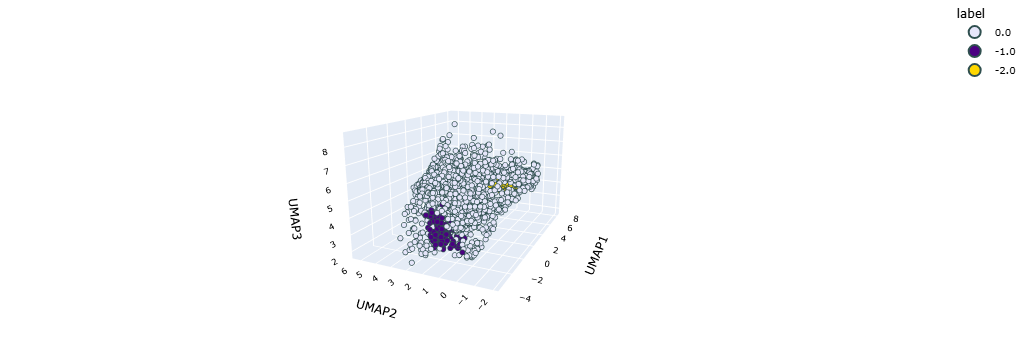

In [50]:
gene_exp = low_doses_adata.X.toarray()
gene_index = low_doses_adata.var.index.get_loc("FN1")
umap_3d_low = pd.DataFrame(low_doses_adata.obsm['X_umap'], columns=['UMAP1','UMAP2','UMAP3'])
umap_3d_low['label'] = low_doses_adata.obs['labels'].reset_index(drop=True) #needs to be type object to specify color 
#umap_3d_low['label'] = umap_3d_low['label'].astype('int64')
umap_3d_low['FN1'] = gene_exp[:,gene_index]
umap_3d_low['dose'] = adata2.obs['dosage'].reset_index(drop=True)
umap_3d_low['dose'] = umap_3d_low['dose'].astype('int64')
umap_3d_low = umap_3d_low.sort_values(by='dose')
umap_3d_low['dose'] = umap_3d_low['dose'].astype('object')
umap_3d_low['dose_num'] = umap_3d_low['dose'].map(dosage_int_dict)
fig = px.scatter_3d(umap_3d_low, 
                    x='UMAP1', 
                    y='UMAP2', 
                    z='UMAP3',
                    size=np.repeat(3, umap_3d_low.shape[0]),
                    color='label',
                    color_discrete_map={-2.0:'#FFD700',0.0:'#E6E6FA',-1.0:'#4B0082'},
                    height=2000)
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
scenes = dict(camera_eye=dict(x = -2,
                              y = 2,
                              z = 0.75))
fig.update_layout(#title_text="UMAP 3D - TOP2A expression", title_x=0.4, title_y=0.95,
                  font_size=10, font_color="black",
                  margin=dict(t=2, r=2, b=2, l=2),  #IMPORTANT to set only 2 pixels margin because 
                                                    #otherwise around each png there is a two big white space
                  paper_bgcolor='white',
                  scene= scenes
)
def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

x_eye = -2
y_eye = 2
z_eye = 0.75

frames=[]
i=0
j=0
# prefix = ['a','b','c','d']
# for t in np.arange(0, 8, 0.5):
#     xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, t)
#     fig.update_layout(scene=dict(camera_eye=dict(x=xe, y=ye, z=ze)))
#     if i==0:
#         pio.write_image(fig, "../generated_data/umap3d_low_treated_doses_knn_updated/images_"+prefix[j] + "_" + str(0)+".jpg", width=2000, height=2000, scale=4, format='jpg')
#     else:
#         if i%10 == 0:
#             j+=1
#         pio.write_image(fig, "../generated_data/umap3d_low_treated_doses_knn_updated/images_"+prefix[j] + "_" + str(i%10)+".jpg", width=2000, height=2000, scale=4, format='jpg')     
#     i+=1
fig.show()